In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sac = pd.read_csv('datasets/Sacramentorealestatetransactions.csv')
sac.head()
print sac['type'].unique()
for x in sac.columns:
    if x != 'street':
        print sac[x].unique()
        
sac

['Residential' 'Condo' 'Multi-Family' 'Unkown']
['SACRAMENTO' 'RANCHO CORDOVA' 'RIO LINDA' 'CITRUS HEIGHTS'
 'NORTH HIGHLANDS' 'ANTELOPE' 'ELK GROVE' 'ELVERTA' 'GALT' 'CARMICHAEL'
 'ORANGEVALE' 'FOLSOM' 'MATHER' 'POLLOCK PINES' 'GOLD RIVER'
 'EL DORADO HILLS' 'RANCHO MURIETA' 'WILTON' 'GREENWOOD' 'FAIR OAKS'
 'CAMERON PARK' 'LINCOLN' 'PLACERVILLE' 'MEADOW VISTA' 'ROSEVILLE'
 'ROCKLIN' 'AUBURN' 'LOOMIS' 'EL DORADO' 'PENRYN' 'GRANITE BAY'
 'FORESTHILL' 'DIAMOND SPRINGS' 'SHINGLE SPRINGS' 'COOL' 'WALNUT GROVE'
 'GARDEN VALLEY' 'SLOUGHHOUSE' 'WEST SACRAMENTO']
[95838 95823 95815 95824 95841 95842 95820 95670 95673 95822 95621 95833
 95660 95834 95843 95832 95827 95828 95758 95626 95825 95835 95624 95632
 95826 95608 95662 95630 95829 95655 95757 95742 95726 95818 95762 95831
 95683 95693 95814 95635 95864 95817 95628 95682 95648 95667 95610 95722
 95816 95678 95747 95819 95811 95677 95765 95603 95661 95650 95821 95623
 95663 95746 95631 95619 95614 95690 95633 95691]
['CA']
[2 3 1 4 0 5 8 

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [2]:
#home_type = ['Residential', 'Condo', 'Multi-Family']
#sac = sac[sac["type"].isin(home_type)]

#beds = [x for x in range(1, 100)]
#sac = sac[sac["beds"].isin(beds)]

#baths = [x for x in range(1, 100)]
#sac = sac[sac["baths"].isin(baths)]

#sac

In [3]:
sac = sac[(sac.beds != 0) & (sac.baths != 0) & (sac['sq__ft'] != 0) & (sac['type'] != 'Unknown')]
sac['$/ft'] = sac['price']/sac['sq__ft']
sac

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,$/ft
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,70.839713
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,58.450728
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,86.532663
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,81.346244
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,102.760351
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,80.143494
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,82.332428
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,77.316907
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,100.855473
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,86.332461


In [4]:
sac = sac[sac['$/ft'] >= 1]

In [5]:
column_list = ['beds', 'baths', 'latitude', 'longitude', '$/ft']
def standard(x):
    return (x-mean_val)/(var_val**0.5)
for y in column_list:
    mean_val = np.mean(sac[y])
    var_val = np.var(sac[y])
    sac[y] = sac[y].apply(standard)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
sac

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,$/ft
0,3526 HIGH ST,SACRAMENTO,95838,CA,-1.460839,-1.438774,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,0.433668,-0.467988,-1.373769
1,51 OMAHA CT,SACRAMENTO,95823,CA,-0.287260,-1.438774,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,-0.778031,-0.435739,-1.600660
2,2796 BRANCH ST,SACRAMENTO,95815,CA,-1.460839,-1.438774,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,0.325906,-0.543020,-1.086370
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,-1.460839,-1.438774,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,0.314265,-0.503720,-1.181354
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,-1.460839,-1.438774,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,-0.456772,-0.475432,-0.789177
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,-0.287260,-1.438774,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,0.676639,0.428590,-1.203381
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,-0.287260,0.062796,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,0.827608,0.228517,-1.163293
7,2561 19TH AVE,SACRAMENTO,95820,CA,-0.287260,-1.438774,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,-0.333061,-0.857281,-1.255147
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,-1.460839,0.062796,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,0.348736,0.908072,-0.824063
9,7325 10TH ST,RIO LINDA,95673,CA,-0.287260,0.062796,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,0.980049,-0.535818,-1.090036


In [7]:
sac['Residential'] = np.where(sac['type'] == 'Residential', 1, 0)
sac['Condo'] = np.where(sac['type'] == 'Condo', 1, 0)
sac['Multi-Family'] = np.where(sac['type'] == 'Multi-Family', 1, 0)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

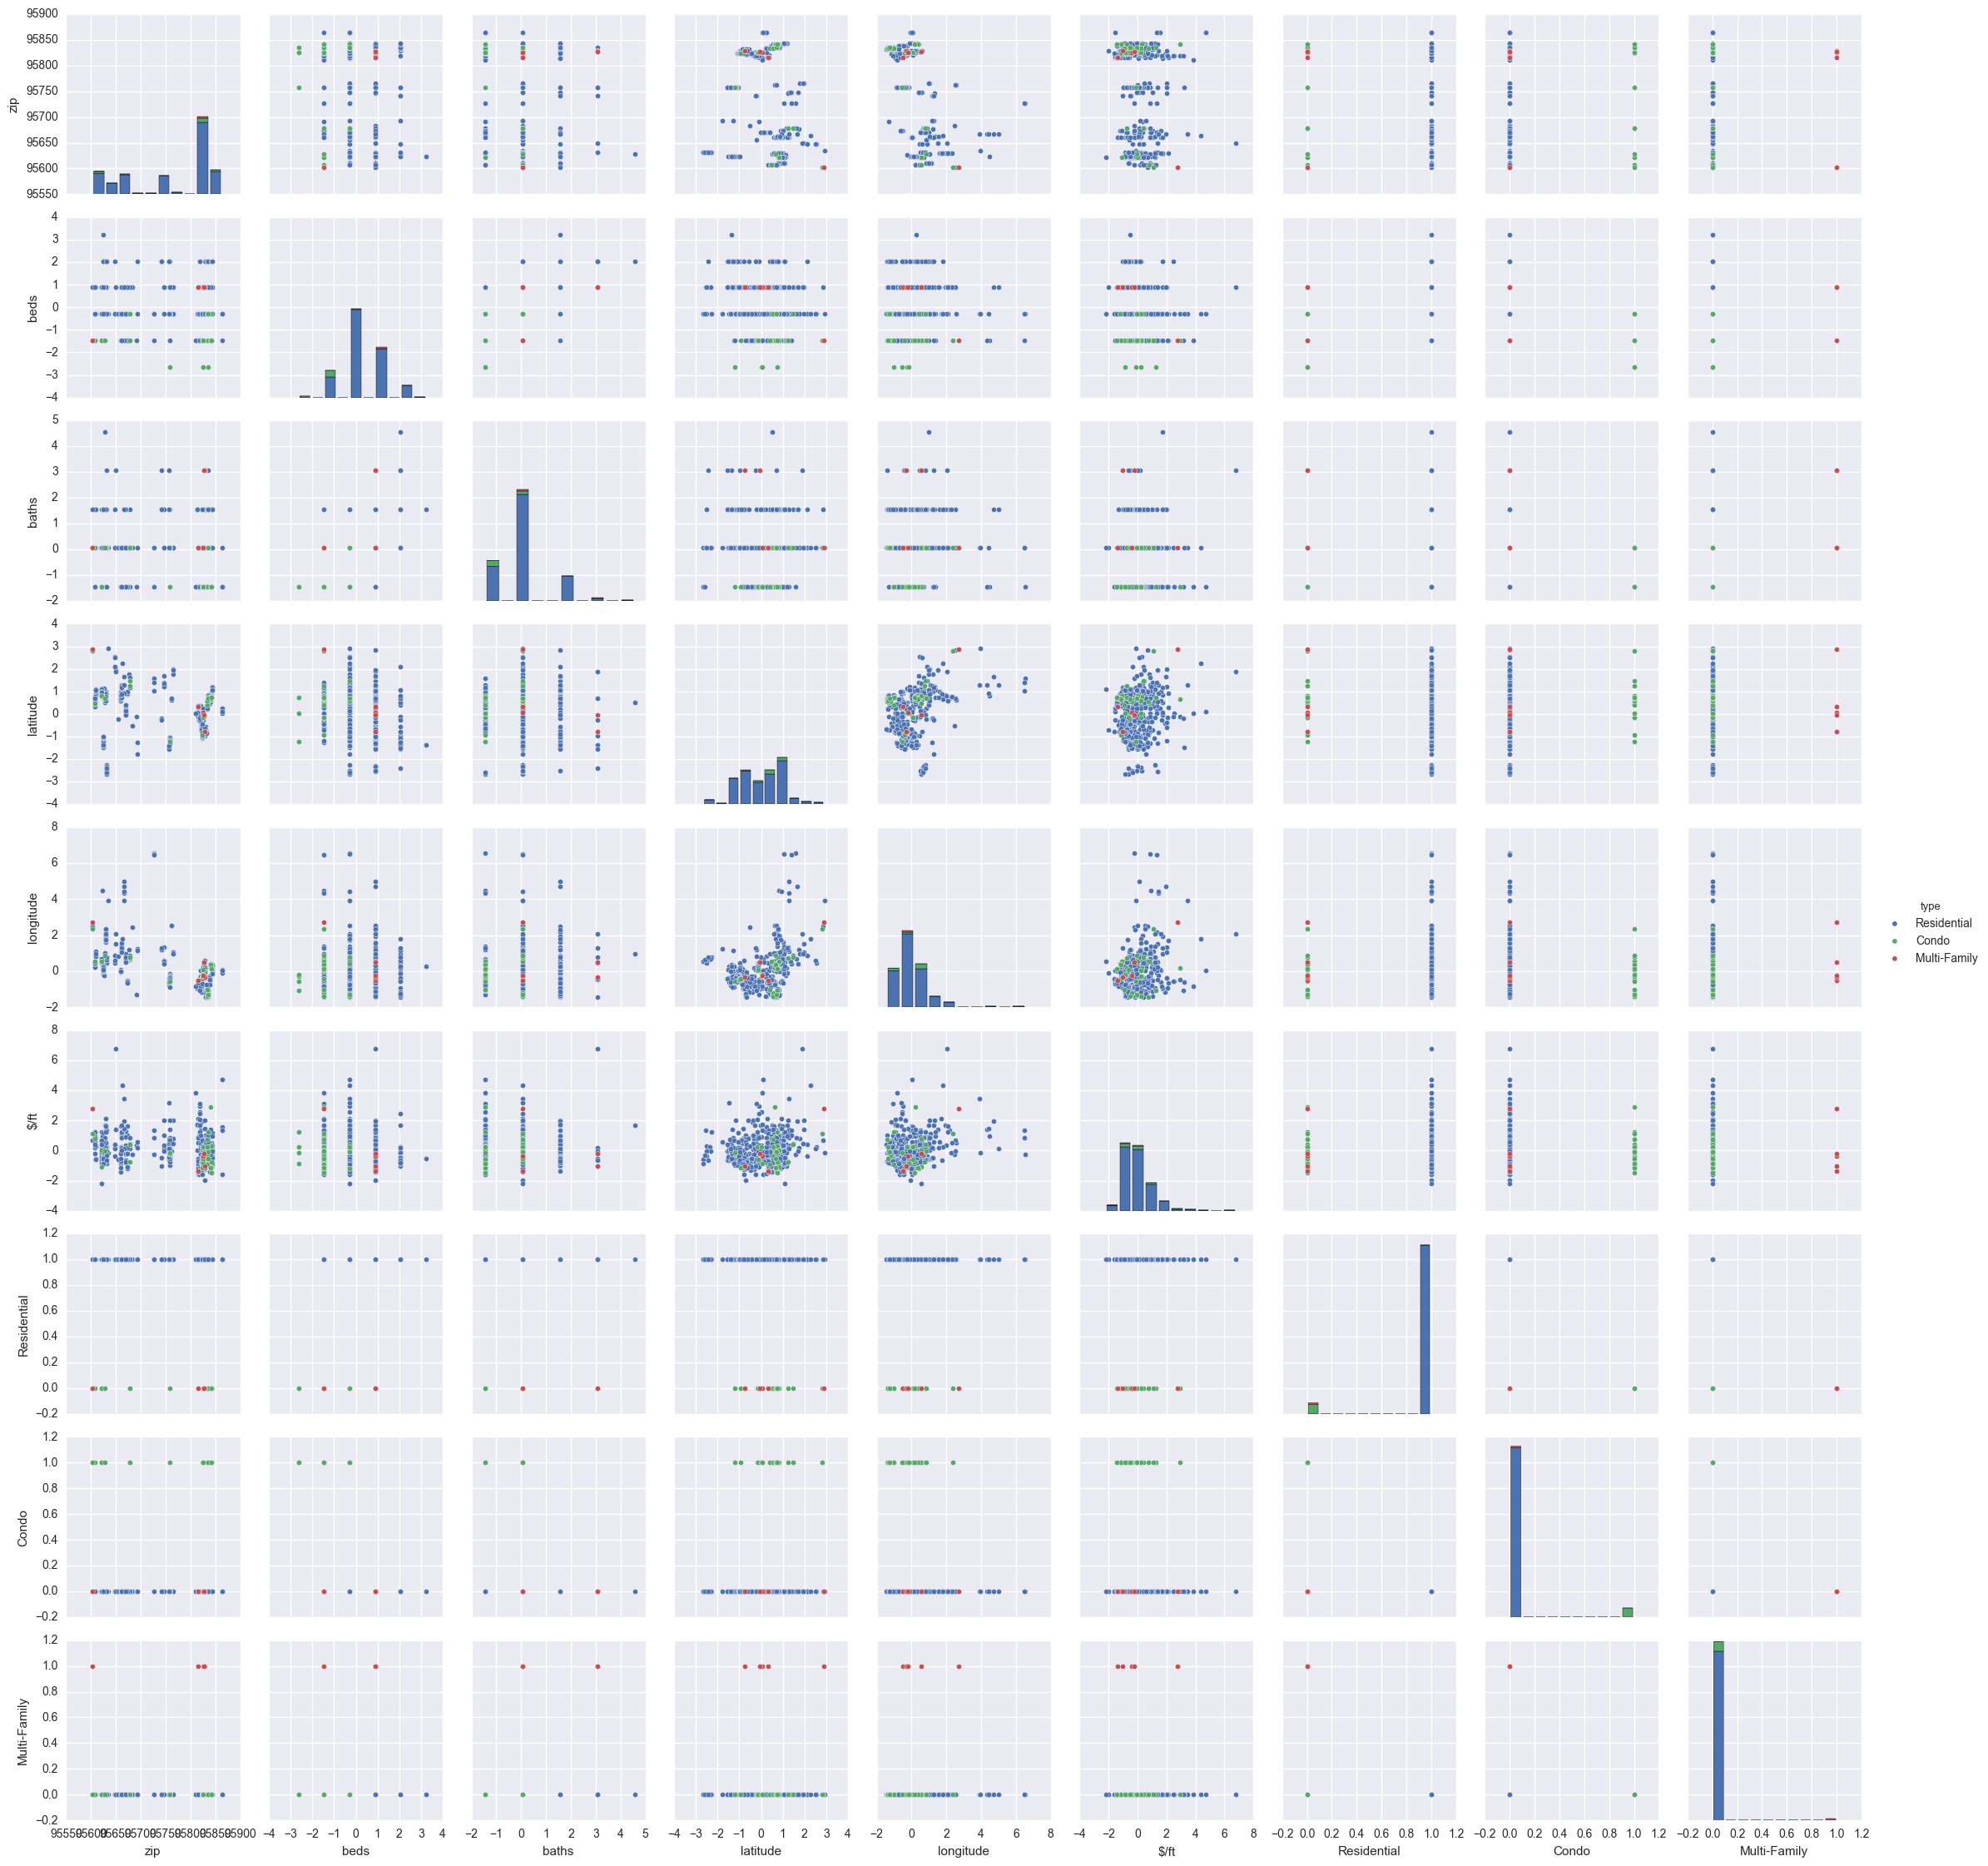

In [8]:
cols = ['zip', 'beds', 'baths', 'latitude', 'longitude', '$/ft', 'Residential', 'Condo', 'Multi-Family', 'type']
sac = sac[cols]
sac

sns.pairplot(sac.sample(n = 500), hue = "type")

In [9]:
cols = ['zip', 'beds', 'baths', 'latitude', 'longitude', '$/ft', 'Residential', 'Condo', 'Multi-Family']
sac = sac[cols]
sac

,zip,beds,baths,latitude,longitude,$/ft,Residential,Condo,Multi-Family
0,95838,-1.460839,-1.438774,0.433668,-0.467988,-1.373769,1,0,0
1,95823,-0.287260,-1.438774,-0.778031,-0.435739,-1.600660,1,0,0
2,95815,-1.460839,-1.438774,0.325906,-0.543020,-1.086370,1,0,0
3,95815,-1.460839,-1.438774,0.314265,-0.503720,-1.181354,1,0,0
4,95824,-1.460839,-1.438774,-0.456772,-0.475432,-0.789177,1,0,0
5,95841,-0.287260,-1.438774,0.676639,0.428590,-1.203381,0,1,0
6,95842,-0.287260,0.062796,0.827608,0.228517,-1.163293,1,0,0
7,95820,-0.287260,-1.438774,-0.333061,-0.857281,-1.255147,1,0,0
8,95670,-1.460839,0.062796,0.348736,0.908072,-0.824063,0,1,0
9,95673,-0.287260,0.062796,0.980049,-0.535818,-1.090036,1,0,0


In [10]:
from sklearn import linear_model as lm
logicReg = lm.LogisticRegression(penalty='l2', C=1.0)
logicReg.fit( sac.ix[:, sac.columns != 'Residential'],sac['Residential'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
pd.get_dummies(sac['zip'])
sac = pd.concat([sac, pd.get_dummies(sac['zip'])], axis=1)
sac.reset_index(inplace=True)
sac = sac.drop('index',axis=1)

sac


,zip,beds,baths,latitude,longitude,$/ft,Residential,Condo,Multi-Family,95603,...,95831,95832,95833,95834,95835,95838,95841,95842,95843,95864
0,95838,-1.460839,-1.438774,0.433668,-0.467988,-1.373769,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,95823,-0.287260,-1.438774,-0.778031,-0.435739,-1.600660,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95815,-1.460839,-1.438774,0.325906,-0.543020,-1.086370,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95815,-1.460839,-1.438774,0.314265,-0.503720,-1.181354,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95824,-1.460839,-1.438774,-0.456772,-0.475432,-0.789177,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,95841,-0.287260,-1.438774,0.676639,0.428590,-1.203381,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,95842,-0.287260,0.062796,0.827608,0.228517,-1.163293,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,95820,-0.287260,-1.438774,-0.333061,-0.857281,-1.255147,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,95670,-1.460839,0.062796,0.348736,0.908072,-0.824063,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,95673,-0.287260,0.062796,0.980049,-0.535818,-1.090036,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
zipcodes = sac.iloc[:, 9:].columns
my_list = list(zipcodes)


myx = ['beds','baths']
for x in myx:
    my_list.append(x)

x = sac[my_list]
y = sac['$/ft']

housecost = lm.RidgeCV(alphas=[.1, 1., 10., 100], cv = 10)
housecost.fit(x,y)
housecost.coef_
housecost.score(x,y)

0.335032238092763

In [33]:
#still working on this part
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

X = sac.iloc[:, 9:]
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_




array([ 3., -2.,  1., -1.])

**Exercise:**

1. Create a linear regression model using scikit - learn (ridge regression for example) that predicts the housing price (Maybe ST, WAY or DR has an impact in the value?). Discuss the features you are using. Which ones do you need to categorize? 
2. Use Cross Validation to find the best regularization constant.
3. Look up sklearn.preprocessing.PolynomialFeatures and use the method to generate ridge regression models with various polynomial degrees. Use cross validation to find the best degree.